In [1]:
from scipy import misc, ndimage
import numpy as np
from matplotlib import pyplot as plt

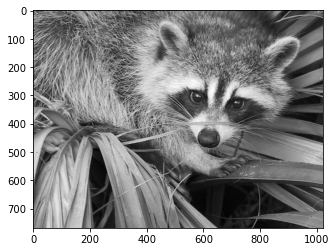

In [5]:
face = misc.face(gray=True)
plt.imshow(face, cmap=plt.cm.gray)

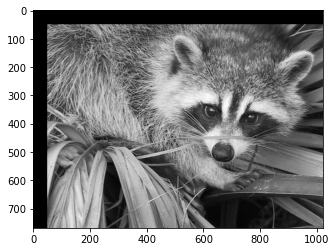

In [6]:
x = ndimage.shift(face, (50,50))
plt.imshow(x, cmap=plt.cm.gray)

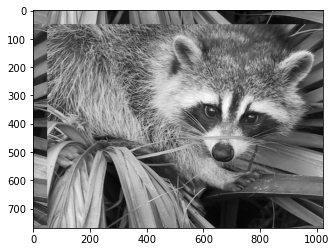

In [11]:
y = ndimage.shift(face, (50,50), mode='grid-wrap')
plt.imshow(y, cmap=plt.cm.gray)

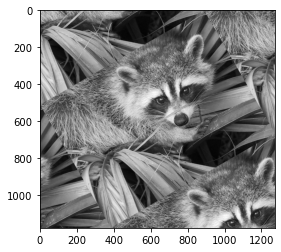

In [14]:
z = ndimage.rotate(face, 30, mode='wrap')
plt.imshow(z, cmap=plt.cm.gray)

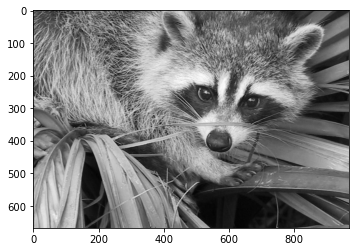

In [17]:
a = face[50:-50,50:-5]
plt.imshow(a, cmap=plt.cm.gray)

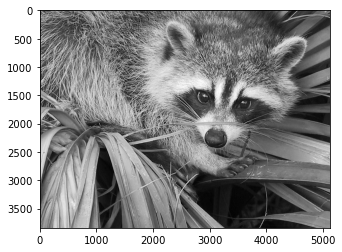

In [20]:
b = ndimage.zoom(face, 5)
plt.imshow(b, cmap=plt.cm.gray);

<ipython-input-22-45cb62ad6c42>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  noisy = np.copy(img).astype(np.float)


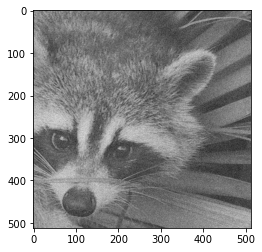

In [22]:
img = face[:512, -512:]
noisy = np.copy(img).astype(np.float)
noisy = noisy + img.std()*0.5*np.random.standard_normal(img.shape)

plt.imshow(noisy, cmap=plt.cm.gray)

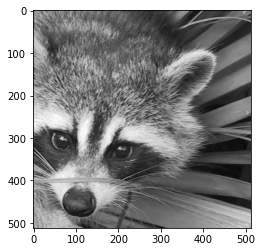

In [23]:
plt.imshow(img, cmap=plt.cm.gray)

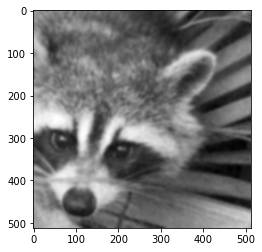

In [26]:
blurry = ndimage.gaussian_filter(noisy, sigma=3)
plt.imshow(blurry, cmap=plt.cm.gray)

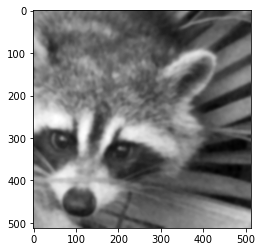

In [27]:
median_face = ndimage.median_filter(blurry, size=5)
plt.imshow(median_face, cmap=plt.cm.gray)

In [28]:
a = np.zeros((7,7), dtype = np.int)
a[1:6, 2:5] = 1
a

<ipython-input-28-3d428b39e8e0>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.zeros((7,7), dtype = np.int)


array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [29]:
ndimage.binary_erosion(a).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [30]:
ndimage.binary_dilation(a).astype(a.dtype)

array([[0, 0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 0]])

closing -> dilation, erosion
opening -> erosion, dilation